## Basic Example Wrangler

In [1]:
import pandas as pd
import numpy as np
from wrangler import Wrangler
from wrangler.data import PandasDataset, CSVDataset
import wrangler.transformers as tr
import wrangler.transformers.text as text_tr
import wrangler.transformers.ml as ml_tr
from wrangler import logger as wrangler_logger

In [5]:

# Uncomment for console logging 
# wrangler_logger.enable()
wrangler_logger.disable()
# wrangler_logger.disable()
# wrangler_logger.enable()

# Uncomment for file output logging
# wlogger.enable_file(filename='logfile.log')

In [7]:
# Creamos el Wrangler
wrangler = Wrangler()

# Definimos Datasets
df_b = pd.DataFrame({"letras_b":["d", "e", "f", "g"],
                    'tipo_b':['consonante','vocal','consonante','consonante'],
                     "numeros_b":[3, 4, 5, 6]})



dataset1 = CSVDataset(name='dataset1', filename='../data/dataset1.csv', save_params={'index':False})
dataset2 = PandasDataset(name='dataset2', data=df_b)

# Agregamos Datasets al Wrangler
wrangler.add_dataset(dataset1)

wrangler.add_dataset(dataset2)

# Agregamos Nodos al Wrangler
wrangler.add_node(
    name= 'primer nodo',
    transformer = tr.JoinTransformer(left_on='letras_a', right_on='letras_b', how='outer'),
    inputs = ['dataset1','dataset2'],
    outputs='dataset3'    
)


wrangler.add_node(
    transformer=tr.ColumnDropper(columns=['numeros_b']),
    inputs = 'dataset3'
    # Si no especificamos un output Wrangler 
    # asigna un dataset 'intermediate' automaticamente
)

wrangler.add_node(
    transformer=tr.DataCheckPoint('../data/checkpoint.csv'),  
    # Si no especificamos ni inputs ni outputs
    # Wrangler utiliza el dataset 'intermediate' como ambos.
)

wrangler.add_node(
    transformer=text_tr.ModeImputer(column='tipo_a'),
)

wrangler.add_node(
    transformer=text_tr.OrdinalEncoderTransformer(columns=['tipo_a']),
    outputs='abt'
)

2022-02-08 at 10:51:48 | INFO | catalog | Adding dataset: intermediate
2022-02-08 at 10:51:48 | INFO | catalog | Adding dataset: dataset1
2022-02-08 at 10:51:48 | INFO | catalog | Adding dataset: dataset2
2022-02-08 at 10:51:48 | INFO | pipeline | Node primer nodo added to Pipeline 
2022-02-08 at 10:51:48 | INFO | pipeline | Node node_1 added to Pipeline 
2022-02-08 at 10:51:48 | INFO | pipeline | Node node_2 added to Pipeline 
2022-02-08 at 10:51:48 | INFO | pipeline | Node node_3 added to Pipeline 
2022-02-08 at 10:51:48 | INFO | pipeline | Node node_4 added to Pipeline 


In [8]:
# Fiteamos los nodos
wrangler.fit_transform()

2022-02-08 at 10:51:50 | INFO | node | Running Node: primer nodo
2022-02-08 at 10:51:50 | INFO | catalog | Loading dataset: dataset1
2022-02-08 at 10:51:50 | DEBUG | base | Loading CSVDataset(name='dataset1', filename='../data/dataset1.csv', save_params=dict)
2022-02-08 at 10:51:51 | INFO | catalog | Loading dataset: dataset2
2022-02-08 at 10:51:51 | DEBUG | base | Loading PandasDataset(name='dataset2', data=DataFrame)
2022-02-08 at 10:51:51 | DEBUG | base | Fitting JoinTransformer(how='outer', left_on='letras_a', right_on='letras_b', left_index=False, right_index=False, suffixes=tuple, merge_kwargs=dict)
2022-02-08 at 10:51:51 | DEBUG | base | Transforming JoinTransformer(how='outer', left_on='letras_a', right_on='letras_b', left_index=False, right_index=False, suffixes=tuple, merge_kwargs=dict)
2022-02-08 at 10:51:51 | INFO | catalog | Saving dataset: dataset3
2022-02-08 at 10:51:51 | INFO | catalog | Adding dataset: dataset3
2022-02-08 at 10:51:51 | INFO | node | Running Node: node_

In [27]:
# Leemos el dataset resultante
# wrangler.data_catalog.load('abt')
wrangler.data_catalog.load('abt')

2022-02-08 at 17:32:10 | INFO | catalog | Loading dataset: abt
2022-02-08 at 17:32:10 | DEBUG | base | Loading PandasDataset(name='abt', data=DataFrame)


,numeros_a,numeros_c,letras_a,nombres,tipo_a,letras_b,tipo_b
0,1,11,a,codri,1.0,NaN,NaN
1,2,12,b,mafi,0.0,NaN,NaN
2,3,13,c,fredi,0.0,NaN,NaN
3,4,14,d,v3,0.0,d,consonante
4,5,15,e,tom,1.0,e,vocal
5,6,16,f,agus,0.0,f,consonante
6,7,17,g,sofi,0.0,g,consonante
7,8,18,h,fredi,0.0,NaN,NaN
8,9,19,i,nahuel,1.0,NaN,NaN
9,10,20,j,emi,0.0,NaN,NaN


In [12]:
# Guardamos el Wrangler fiteado
# Solo se guardaran los datasets que no esten en memoria
# es decir, solo los que no sean del tipo PandasDataset
wrangler.save('../data/basic_example_wrangler')

In [13]:
# Creamos un nuevo Wrangler vacio
new_wrangler = Wrangler()

2022-02-08 at 10:52:47 | INFO | catalog | Adding dataset: intermediate


In [14]:
new_wrangler.load('../data/basic_example_wrangler')

In [15]:
new_wrangler.data_catalog.datasets

{'dataset1': CSVDataset(name='dataset1', filename='../data/dataset1.csv', save_params=dict)}

In [16]:
# El Wrangler necesita dataset1 y dataset2 para ejecutar
new_wrangler.pipeline.inputs()

{'dataset1', 'dataset2'}

In [17]:
df_a_test = pd.DataFrame({
    "letras_a":["h", "i", "j", "j", "l", "m",'n'],
    'tipo_a':['consonante','vocal','consonante','consonante','consonante','consonante',np.NaN],
    "numeros_a":[1, 2, 3, 4, 5, 6, np.NaN]
                     })


df_b_test = pd.DataFrame({
    "letras_b":["o", "p", "q", "r"],
    'tipo_b':['vocal','consonante','consonante','consonante'],
    "numeros_b":[3, 4, 5, 6]
                     })

dataset_test1 = PandasDataset('dataset1',df_a_test)
dataset_test2 = PandasDataset('dataset2',df_b_test)

# Agregamos/Sobreescribimos los nuevos dataset1 y dataset2
new_wrangler.add_dataset(dataset_test1)
new_wrangler.add_dataset(dataset_test2)

2022-02-08 at 10:53:09 | INFO | catalog | Adding dataset: dataset1
2022-02-08 at 10:53:09 | INFO | catalog | Adding dataset: dataset2


In [18]:
# Aplicamos las transformaciones predefinidas 
new_wrangler.transform()

2022-02-08 at 10:53:11 | INFO | node | Running Node: primer nodo
2022-02-08 at 10:53:11 | INFO | catalog | Loading dataset: dataset1
2022-02-08 at 10:53:11 | DEBUG | base | Loading PandasDataset(name='dataset1', data=DataFrame)
2022-02-08 at 10:53:11 | INFO | catalog | Loading dataset: dataset2
2022-02-08 at 10:53:11 | DEBUG | base | Loading PandasDataset(name='dataset2', data=DataFrame)
2022-02-08 at 10:53:11 | DEBUG | base | Transforming JoinTransformer(how='outer', left_on='letras_a', right_on='letras_b', left_index=False, right_index=False, suffixes=tuple, merge_kwargs=dict)
2022-02-08 at 10:53:11 | INFO | catalog | Saving dataset: dataset3
2022-02-08 at 10:53:11 | INFO | catalog | Adding dataset: dataset3
2022-02-08 at 10:53:11 | INFO | node | Running Node: node_1
2022-02-08 at 10:53:11 | INFO | catalog | Loading dataset: dataset3
2022-02-08 at 10:53:11 | DEBUG | base | Loading PandasDataset(name='dataset3', data=DataFrame)
2022-02-08 at 10:53:11 | DEBUG | base | Transforming Colu

In [19]:
new_wrangler.data_catalog.load('abt')

2022-02-08 at 10:53:15 | INFO | catalog | Loading dataset: abt
2022-02-08 at 10:53:15 | DEBUG | base | Loading PandasDataset(name='abt', data=DataFrame)


,letras_a,tipo_a,numeros_a,letras_b,tipo_b
0,h,0.0,1.0,NaN,NaN
1,i,1.0,2.0,NaN,NaN
2,j,0.0,3.0,NaN,NaN
3,j,0.0,4.0,NaN,NaN
4,l,0.0,5.0,NaN,NaN
5,m,0.0,6.0,NaN,NaN
6,n,0.0,NaN,NaN,NaN
7,NaN,0.0,NaN,o,vocal
8,NaN,0.0,NaN,p,consonante
9,NaN,0.0,NaN,q,consonante


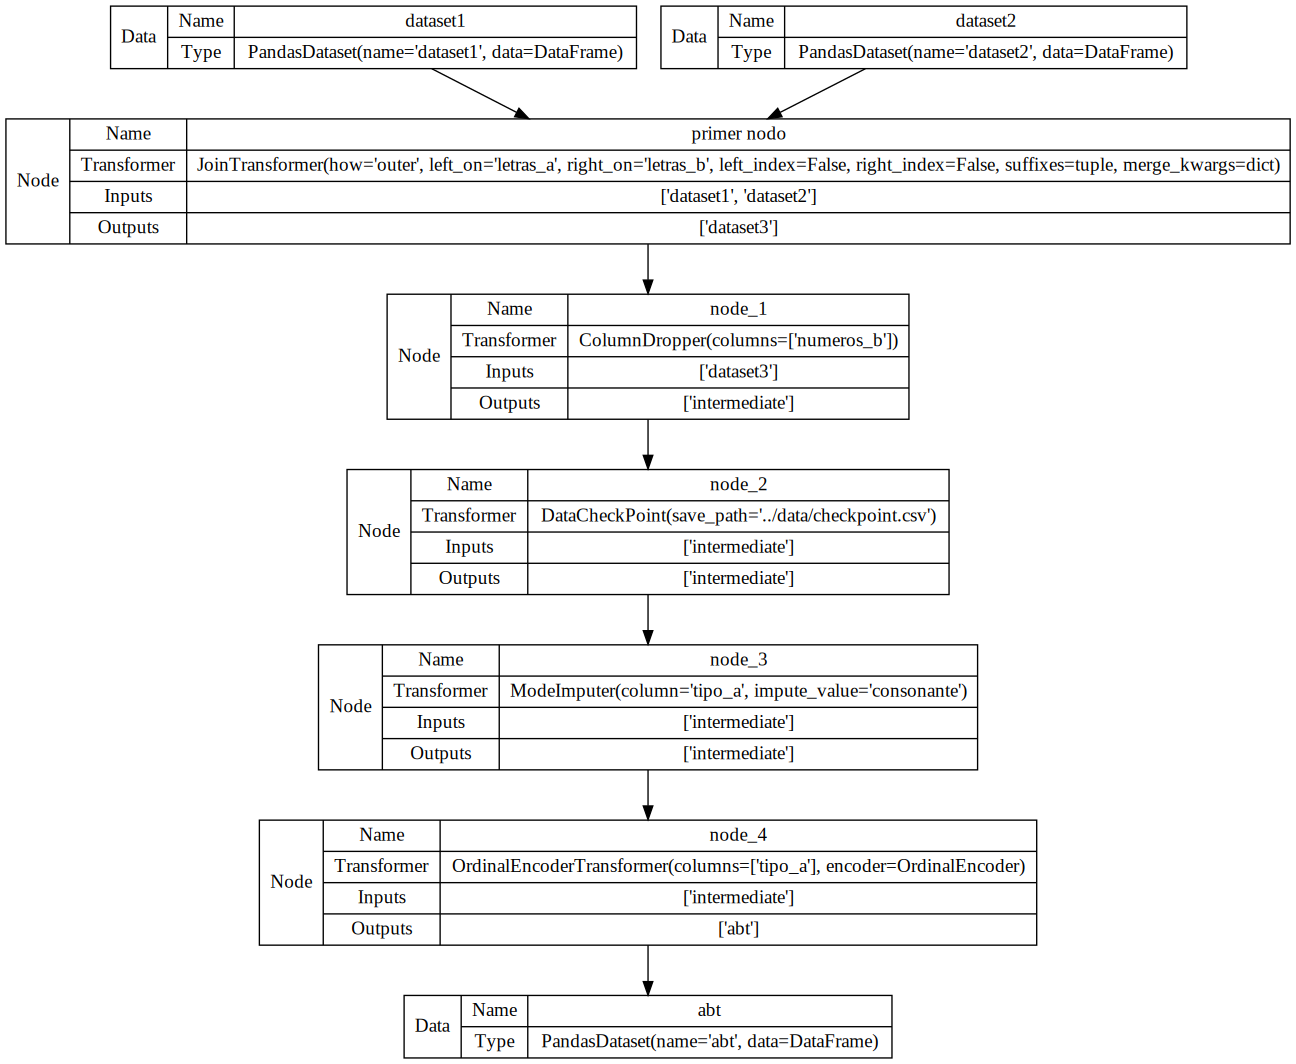

In [20]:
from wrangler.extras import plot_wrangler

plot_wrangler(new_wrangler)

In [21]:
# Exportamos la configuracion de los datasets a un .yaml para poder modificarlos
new_wrangler.datasets_to_config("../data/basic_example_datasets.yml")

In [23]:
# levantamos un wrangler nuevo
new_wrangler2 = Wrangler()

new_wrangler2.load('../data/basic_example_wrangler')

2022-02-08 at 10:54:52 | INFO | catalog | Adding dataset: intermediate


In [24]:
# Seteamos la configuracion de los datasets a partir del yaml
new_wrangler2.datasets_from_config("../data/basic_example_datasets_new.yml")

2022-02-08 at 10:54:53 | INFO | catalog | Adding dataset: dataset1
2022-02-08 at 10:54:53 | INFO | catalog | Adding dataset: dataset2
2022-02-08 at 10:54:53 | INFO | catalog | Adding dataset: abt


In [25]:
new_wrangler2.transform()

2022-02-08 at 10:54:57 | INFO | node | Running Node: primer nodo
2022-02-08 at 10:54:57 | INFO | catalog | Loading dataset: dataset1
2022-02-08 at 10:54:57 | DEBUG | base | Loading CSVDataset(name='dataset1', filename='../data/dataset1.csv')
2022-02-08 at 10:54:57 | INFO | catalog | Loading dataset: dataset2
2022-02-08 at 10:54:57 | DEBUG | base | Loading CSVDataset(name='dataset2', filename='../data/dataset2.csv')
2022-02-08 at 10:54:58 | DEBUG | base | Transforming JoinTransformer(how='outer', left_on='letras_a', right_on='letras_b', left_index=False, right_index=False, suffixes=tuple, merge_kwargs=dict)
2022-02-08 at 10:54:58 | INFO | catalog | Saving dataset: dataset3
2022-02-08 at 10:54:58 | INFO | catalog | Adding dataset: dataset3
2022-02-08 at 10:54:58 | INFO | node | Running Node: node_1
2022-02-08 at 10:54:58 | INFO | catalog | Loading dataset: dataset3
2022-02-08 at 10:54:58 | DEBUG | base | Loading PandasDataset(name='dataset3', data=DataFrame)
2022-02-08 at 10:54:58 | DEBU